In [2]:
from keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(x_train, t_train), (x_test, t_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [5]:
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0

In [6]:
cnn = Sequential()
cnn.add(Conv2D(input_shape=(28, 28, 1), kernel_size=(3, 3), filters=32, activation='relu'))
cnn.add(Conv2D(kernel_size=(3,3), filters=64, activation='relu'))
cnn.add(MaxPool2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))

cnn.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [7]:
hist = cnn.fit(x_train, t_train, batch_size=128, epochs=30, validation_data=(x_test, t_test))

Epoch 1/30
469/469 [==============================] - 14s 10ms/step - loss: 0.5340 - accuracy: 0.8126 - val_loss: 0.3292 - val_accuracy: 0.8824
Epoch 2/30
469/469 [==============================] - 4s 9ms/step - loss: 0.3442 - accuracy: 0.8784 - val_loss: 0.2798 - val_accuracy: 0.8982
Epoch 3/30
469/469 [==============================] - 4s 9ms/step - loss: 0.2919 - accuracy: 0.8968 - val_loss: 0.2534 - val_accuracy: 0.9086
Epoch 4/30
469/469 [==============================] - 4s 9ms/step - loss: 0.2599 - accuracy: 0.9053 - val_loss: 0.2426 - val_accuracy: 0.9082
Epoch 5/30
469/469 [==============================] - 4s 9ms/step - loss: 0.2388 - accuracy: 0.9137 - val_loss: 0.2283 - val_accuracy: 0.9169
Epoch 6/30
469/469 [==============================] - 4s 9ms/step - loss: 0.2211 - accuracy: 0.9197 - val_loss: 0.2224 - val_accuracy: 0.9220
Epoch 7/30
469/469 [==============================] - 4s 9ms/step - loss: 0.2041 - accuracy: 0.9254 - val_loss: 0.2231 - val_accuracy: 0.9201
Epoc

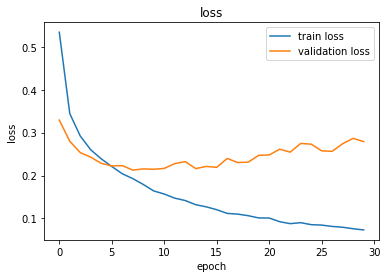

In [8]:
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')

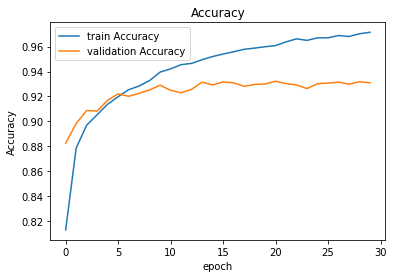

In [9]:
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.plot(hist.history['accuracy'], label='train Accuracy')
plt.plot(hist.history['val_accuracy'], label='validation Accuracy')
plt.legend(loc='best')